## Restaurant Rating Prediction:-
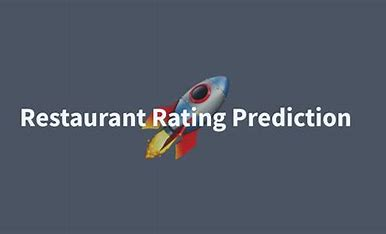
The restaurant rating dataset comprises customer information, including location, demographics, dining preferences, and ratings for overall satisfaction, food quality, and service. It offers valuable insights into customer experiences, enabling analysis and improvements in restaurant performance, making it a valuable resource for the hospitality industry and data-driven decision-making.

## Importing Nassaries libraries.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings("ignore")

## Load Train dataset

In [2]:
df = pd.read_excel(r"C:\Users\Dell\OneDrive\Desktop\I become a data analyst this months\excel\datasets\restaurant rating\train_dataset.xlsx")
df.head(5)

,Consumer_ID,Restaurant_ID,City,State,Country,Latitude,Longitude,Smoker,Drink_Level,Transportation_Method,...,Budget,Preferred_Cuisine,Restaurant Name,Alcohol_Service,Smoking_Allowed,Price,Franchise,Area,Parking,Rating
0,U1001,132830,San Luis Potosi,San Luis Potosi,Mexico,22.139997,-100.978803,No,Abstemious,On Foot,...,Medium,American,Rincon Huasteco,None,No,Low,No,Closed,None,1
1,U1002,132921,San Luis Potosi,San Luis Potosi,Mexico,22.150087,-100.983325,No,Abstemious,Public,...,Low,Mexican,Crudalia,Wine & Beer,Smoking Section,Low,No,Open,None,2
2,U1003,135064,San Luis Potosi,San Luis Potosi,Mexico,22.119847,-100.946527,No,Social Drinker,Public,...,Low,Mexican,Restaurante El Chivero S.A. De C.V.,None,No,High,No,Closed,Yes,0
3,U1004,135060,Cuernavaca,Morelos,Mexico,18.867000,-99.183000,No,Abstemious,Public,...,Medium,Bakery,Restaurante Marisco Sam,None,No,Medium,No,Closed,None,1
4,U1005,135050,San Luis Potosi,San Luis Potosi,Mexico,22.183477,-100.959891,No,Abstemious,Public,...,Medium,American,Restaurante La Estrella De Dima,Wine & Beer,No,High,No,Closed,Yes,1


In [3]:
# dataset shape 
df.shape

(114, 24)

In [4]:
df.columns

Index(['Consumer_ID', 'Restaurant_ID', 'City', 'State', 'Country', 'Latitude',
       'Longitude', 'Smoker', 'Drink_Level', 'Transportation_Method',
       'Marital_Status', 'Children', 'Age', 'Occupation', 'Budget',
       'Preferred_Cuisine', 'Restaurant Name', 'Alcohol_Service',
       'Smoking_Allowed', 'Price', 'Franchise', 'Area', 'Parking', 'Rating'],
      dtype='object')

In [5]:
# drop unvanted columns

df.drop(columns=["Restaurant_ID","Country","Latitude","Longitude"],axis=1,inplace=True)

In [6]:
df.columns

Index(['Consumer_ID', 'City', 'State', 'Smoker', 'Drink_Level',
       'Transportation_Method', 'Marital_Status', 'Children', 'Age',
       'Occupation', 'Budget', 'Preferred_Cuisine', 'Restaurant Name',
       'Alcohol_Service', 'Smoking_Allowed', 'Price', 'Franchise', 'Area',
       'Parking', 'Rating'],
      dtype='object')

In [7]:
#check duplicate values
df.duplicated().sum()

0

In [8]:
#check missing values
df.isna().sum()

Consumer_ID              0
City                     0
State                    0
Smoker                   1
Drink_Level              0
Transportation_Method    4
Marital_Status           2
Children                 8
Age                      0
Occupation               5
Budget                   4
Preferred_Cuisine        0
Restaurant Name          0
Alcohol_Service          0
Smoking_Allowed          0
Price                    0
Franchise                0
Area                     0
Parking                  0
Rating                   0
dtype: int64

In [9]:
# dataset column dytype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Consumer_ID            114 non-null    object
 1   City                   114 non-null    object
 2   State                  114 non-null    object
 3   Smoker                 113 non-null    object
 4   Drink_Level            114 non-null    object
 5   Transportation_Method  110 non-null    object
 6   Marital_Status         112 non-null    object
 7   Children               106 non-null    object
 8   Age                    114 non-null    int64 
 9   Occupation             109 non-null    object
 10  Budget                 110 non-null    object
 11  Preferred_Cuisine      114 non-null    object
 12  Restaurant Name        114 non-null    object
 13  Alcohol_Service        114 non-null    object
 14  Smoking_Allowed        114 non-null    object
 15  Price                  

In [10]:
# checking statiscal tecknique
df.describe(include="object").T

,count,unique,top,freq
Consumer_ID,114,114,U1001,1
City,114,4,San Luis Potosi,71
State,114,3,San Luis Potosi,71
Smoker,113,2,No,91
Drink_Level,114,3,Abstemious,43
Transportation_Method,110,3,Public,66
Marital_Status,112,2,Single,105
Children,106,3,Independent,95
Occupation,109,3,Student,93
Budget,110,3,Medium,81


In [11]:
# checking statiscal tecknique
df.describe()

,Age,Rating
count,114.000000,114.000000
mean,27.184211,1.131579
std,14.234798,0.697824
min,18.000000,0.000000
25%,21.000000,1.000000
50%,23.000000,1.000000
75%,25.000000,2.000000
max,82.000000,2.000000


## Handling Missing Values

In [12]:
df.isna().sum()

Consumer_ID              0
City                     0
State                    0
Smoker                   1
Drink_Level              0
Transportation_Method    4
Marital_Status           2
Children                 8
Age                      0
Occupation               5
Budget                   4
Preferred_Cuisine        0
Restaurant Name          0
Alcohol_Service          0
Smoking_Allowed          0
Price                    0
Franchise                0
Area                     0
Parking                  0
Rating                   0
dtype: int64

In [13]:
#filing the missing values
df["Smoker"] = df["Smoker"].fillna(df["Smoker"].mode()[0])
df["Transportation_Method"] = df["Transportation_Method"].fillna(df["Transportation_Method"].mode()[0])
df["Marital_Status"] = df["Marital_Status"].fillna(df["Marital_Status"].mode()[0])
df["Children"] = df["Children"].fillna(df["Children"].mode()[0])
df["Occupation"] = df["Occupation"].fillna(df["Occupation"].mode()[0])
df["Budget"] = df["Budget"].fillna(df["Budget"].mode()[0])


In [14]:
df.isna().sum()

Consumer_ID              0
City                     0
State                    0
Smoker                   0
Drink_Level              0
Transportation_Method    0
Marital_Status           0
Children                 0
Age                      0
Occupation               0
Budget                   0
Preferred_Cuisine        0
Restaurant Name          0
Alcohol_Service          0
Smoking_Allowed          0
Price                    0
Franchise                0
Area                     0
Parking                  0
Rating                   0
dtype: int64

## Data Visulazation power bi dashboard

![image.png](C:\Users\Dell\Downloads\restaurant Rating Analysis dashboard-1.png)

## 
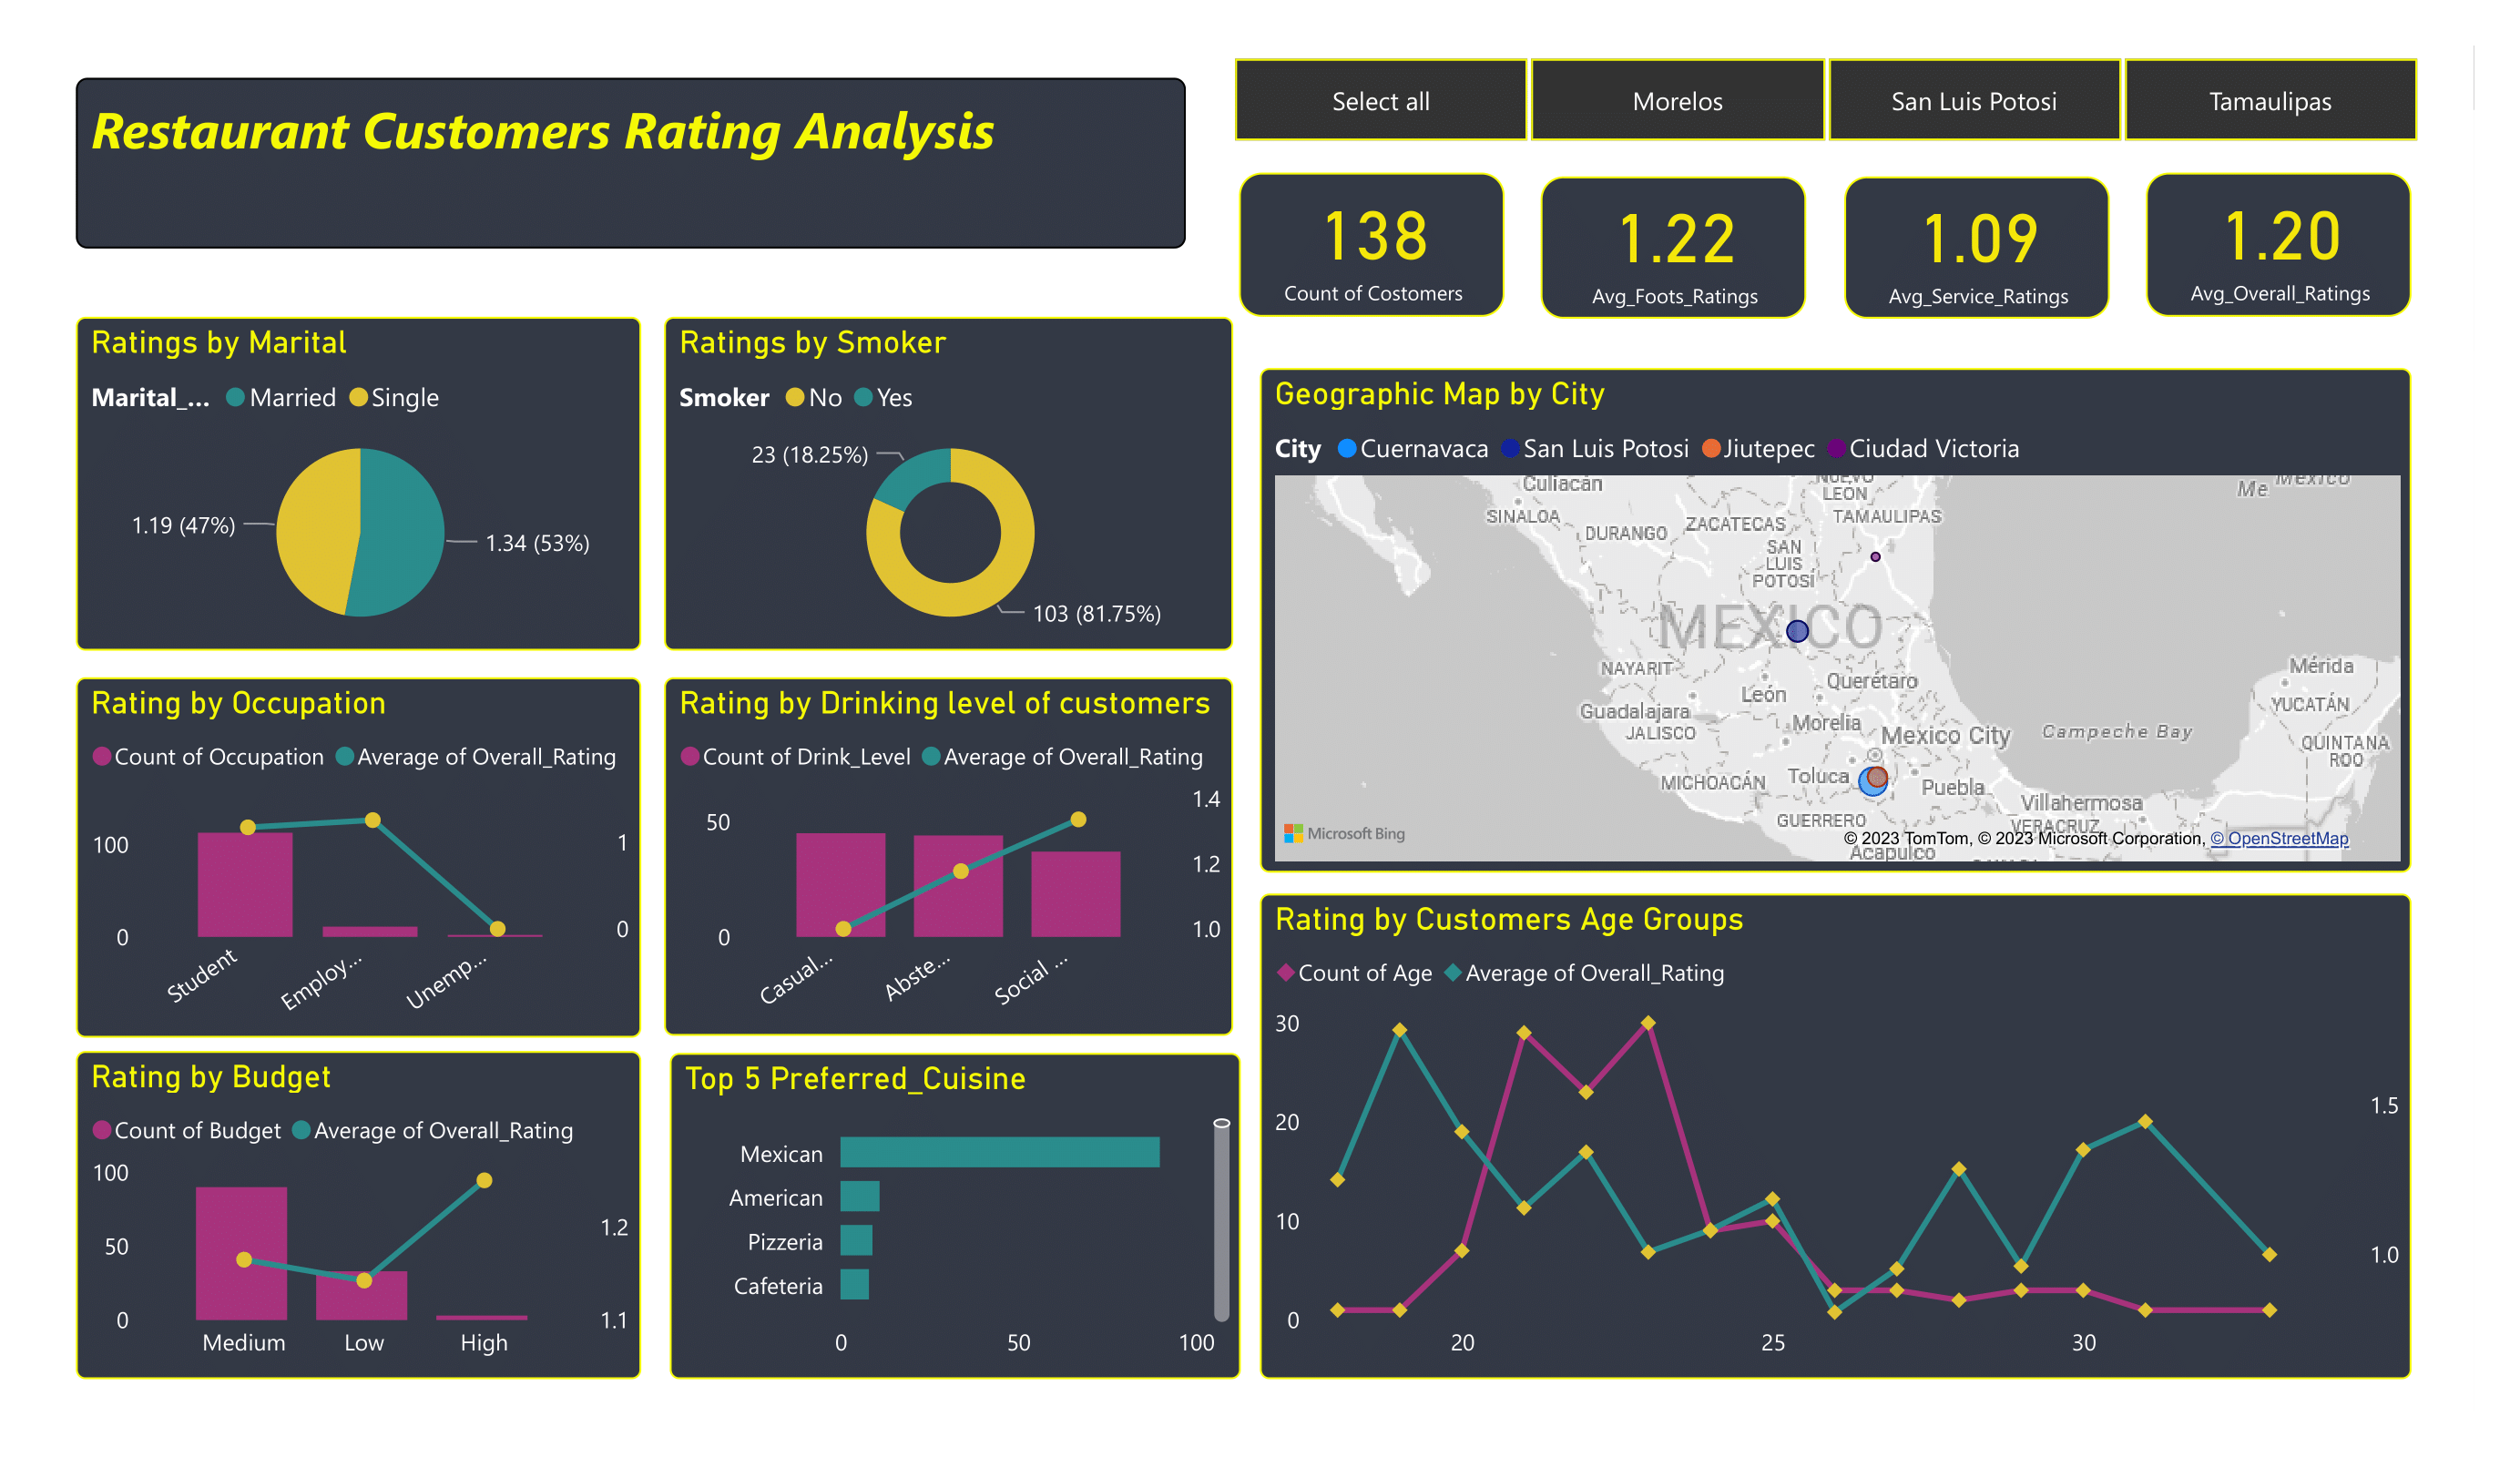

## 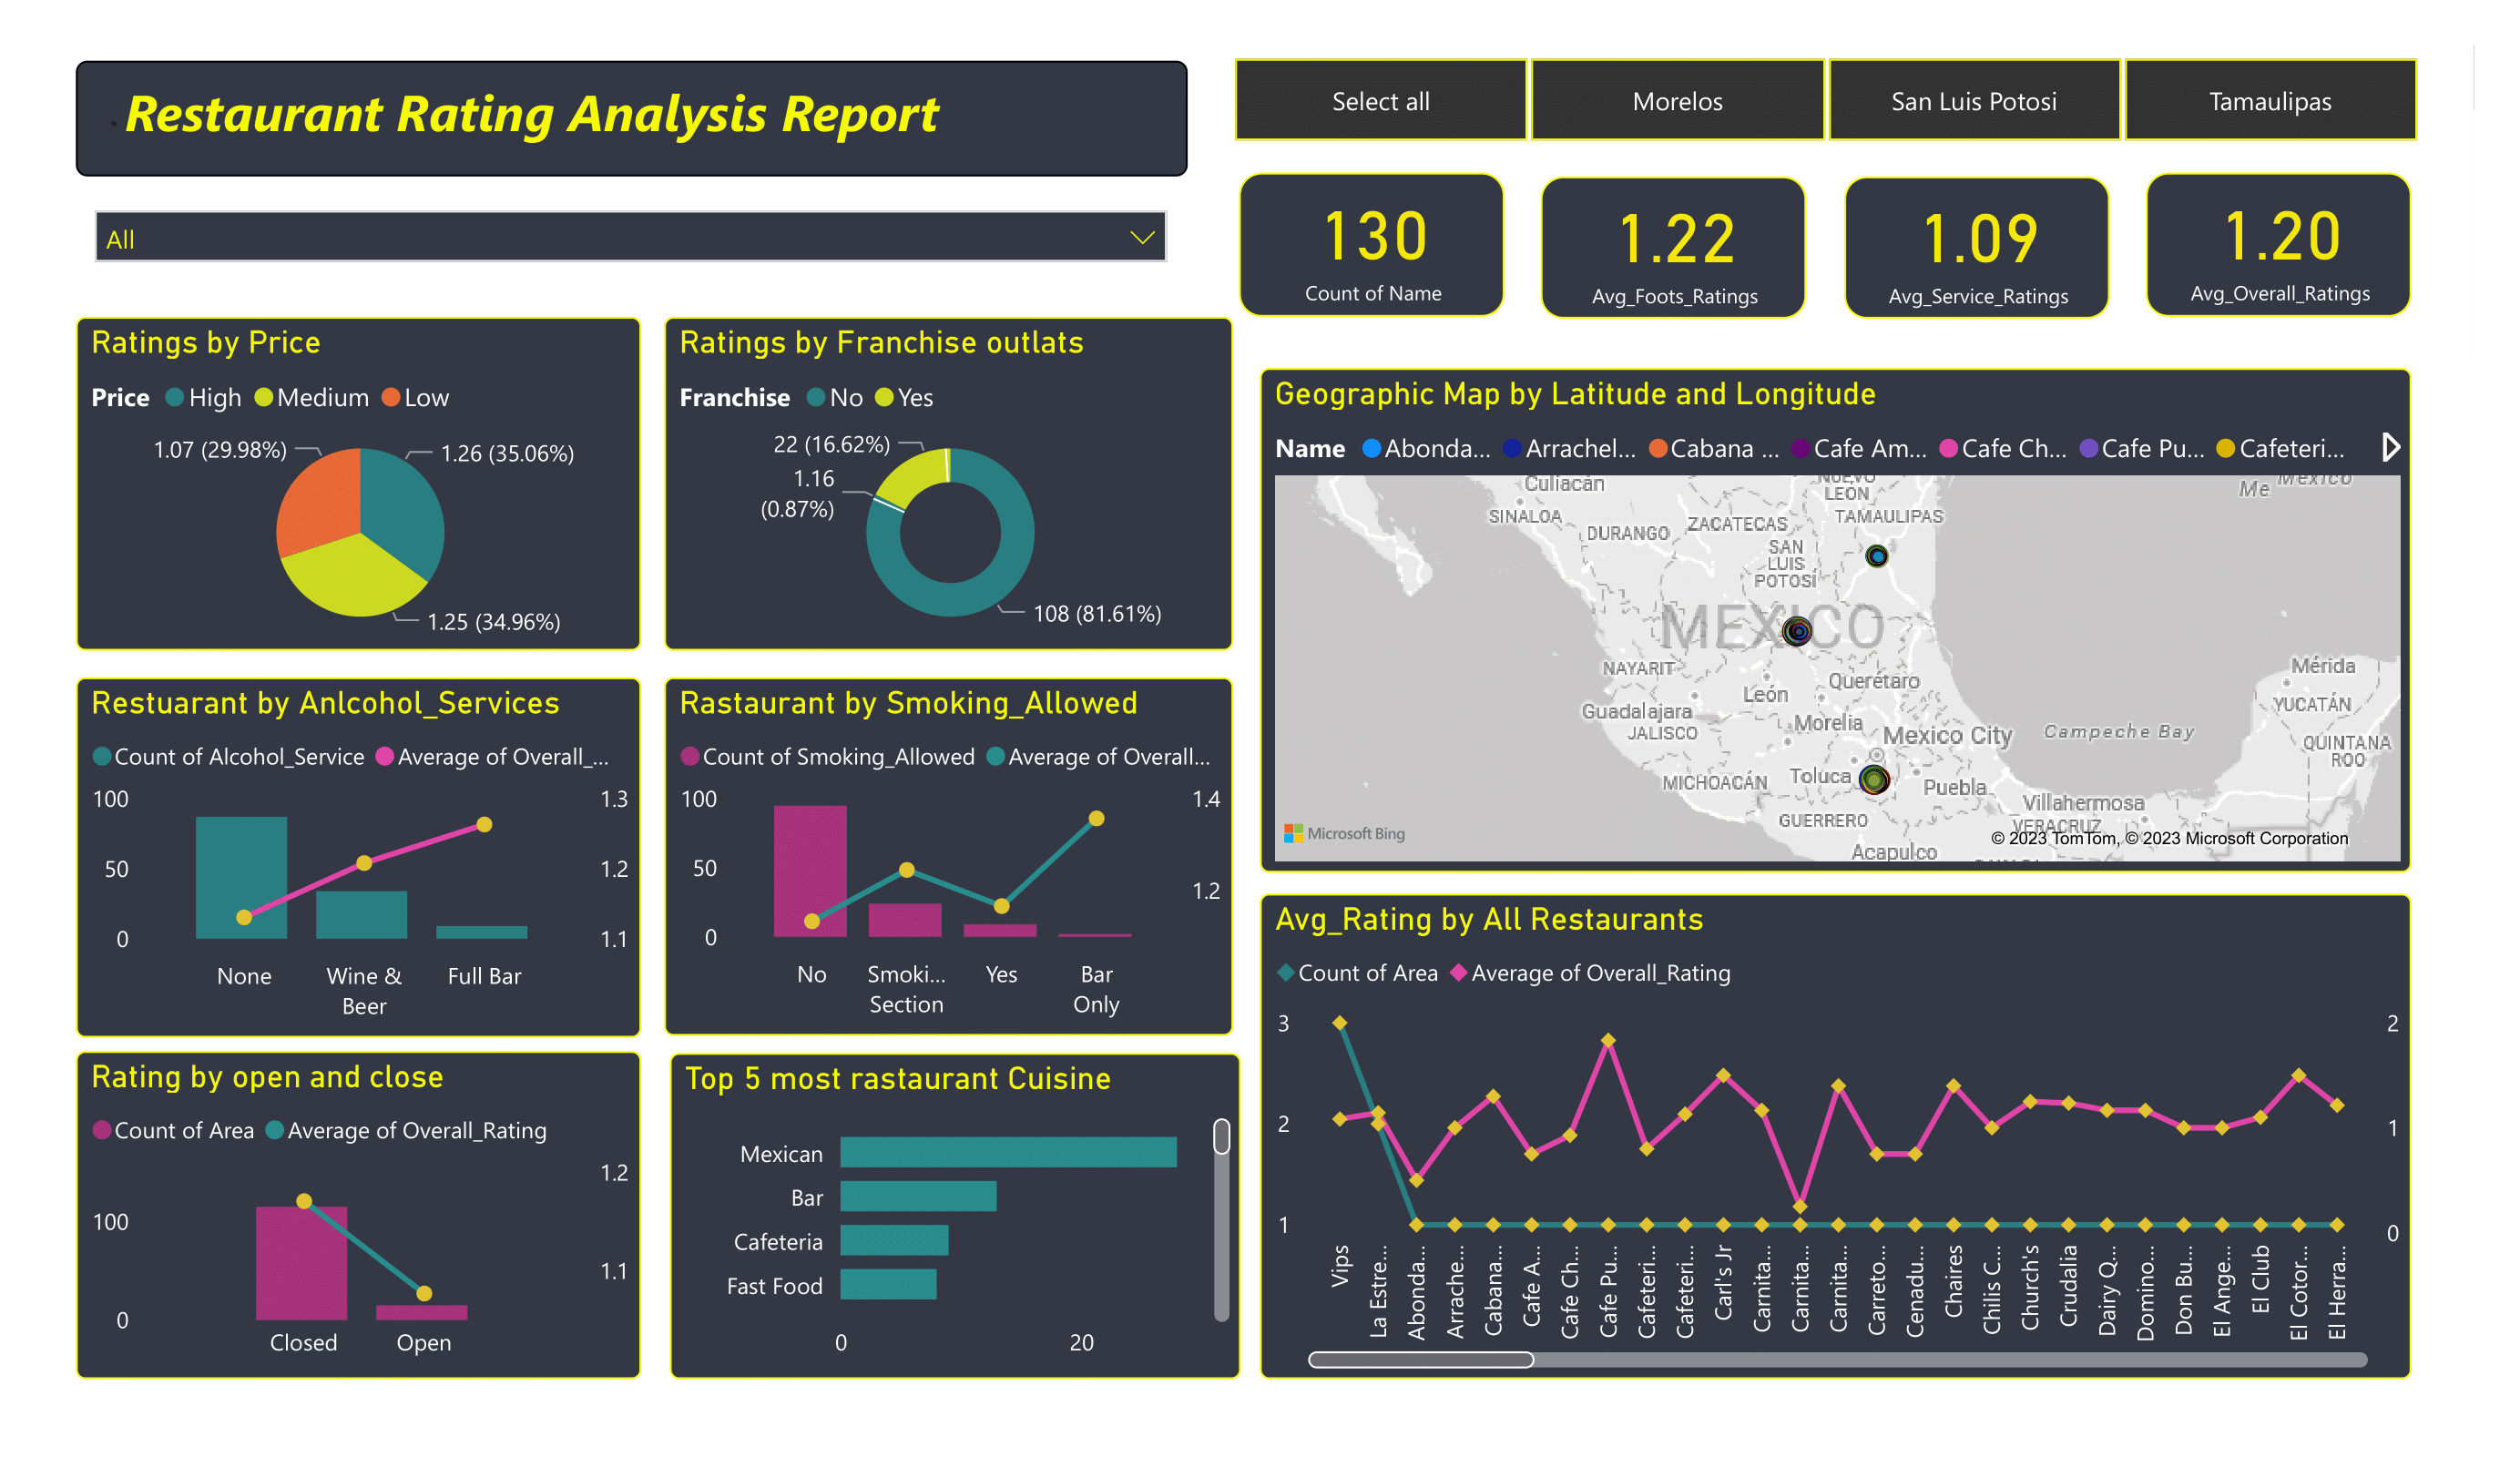

## 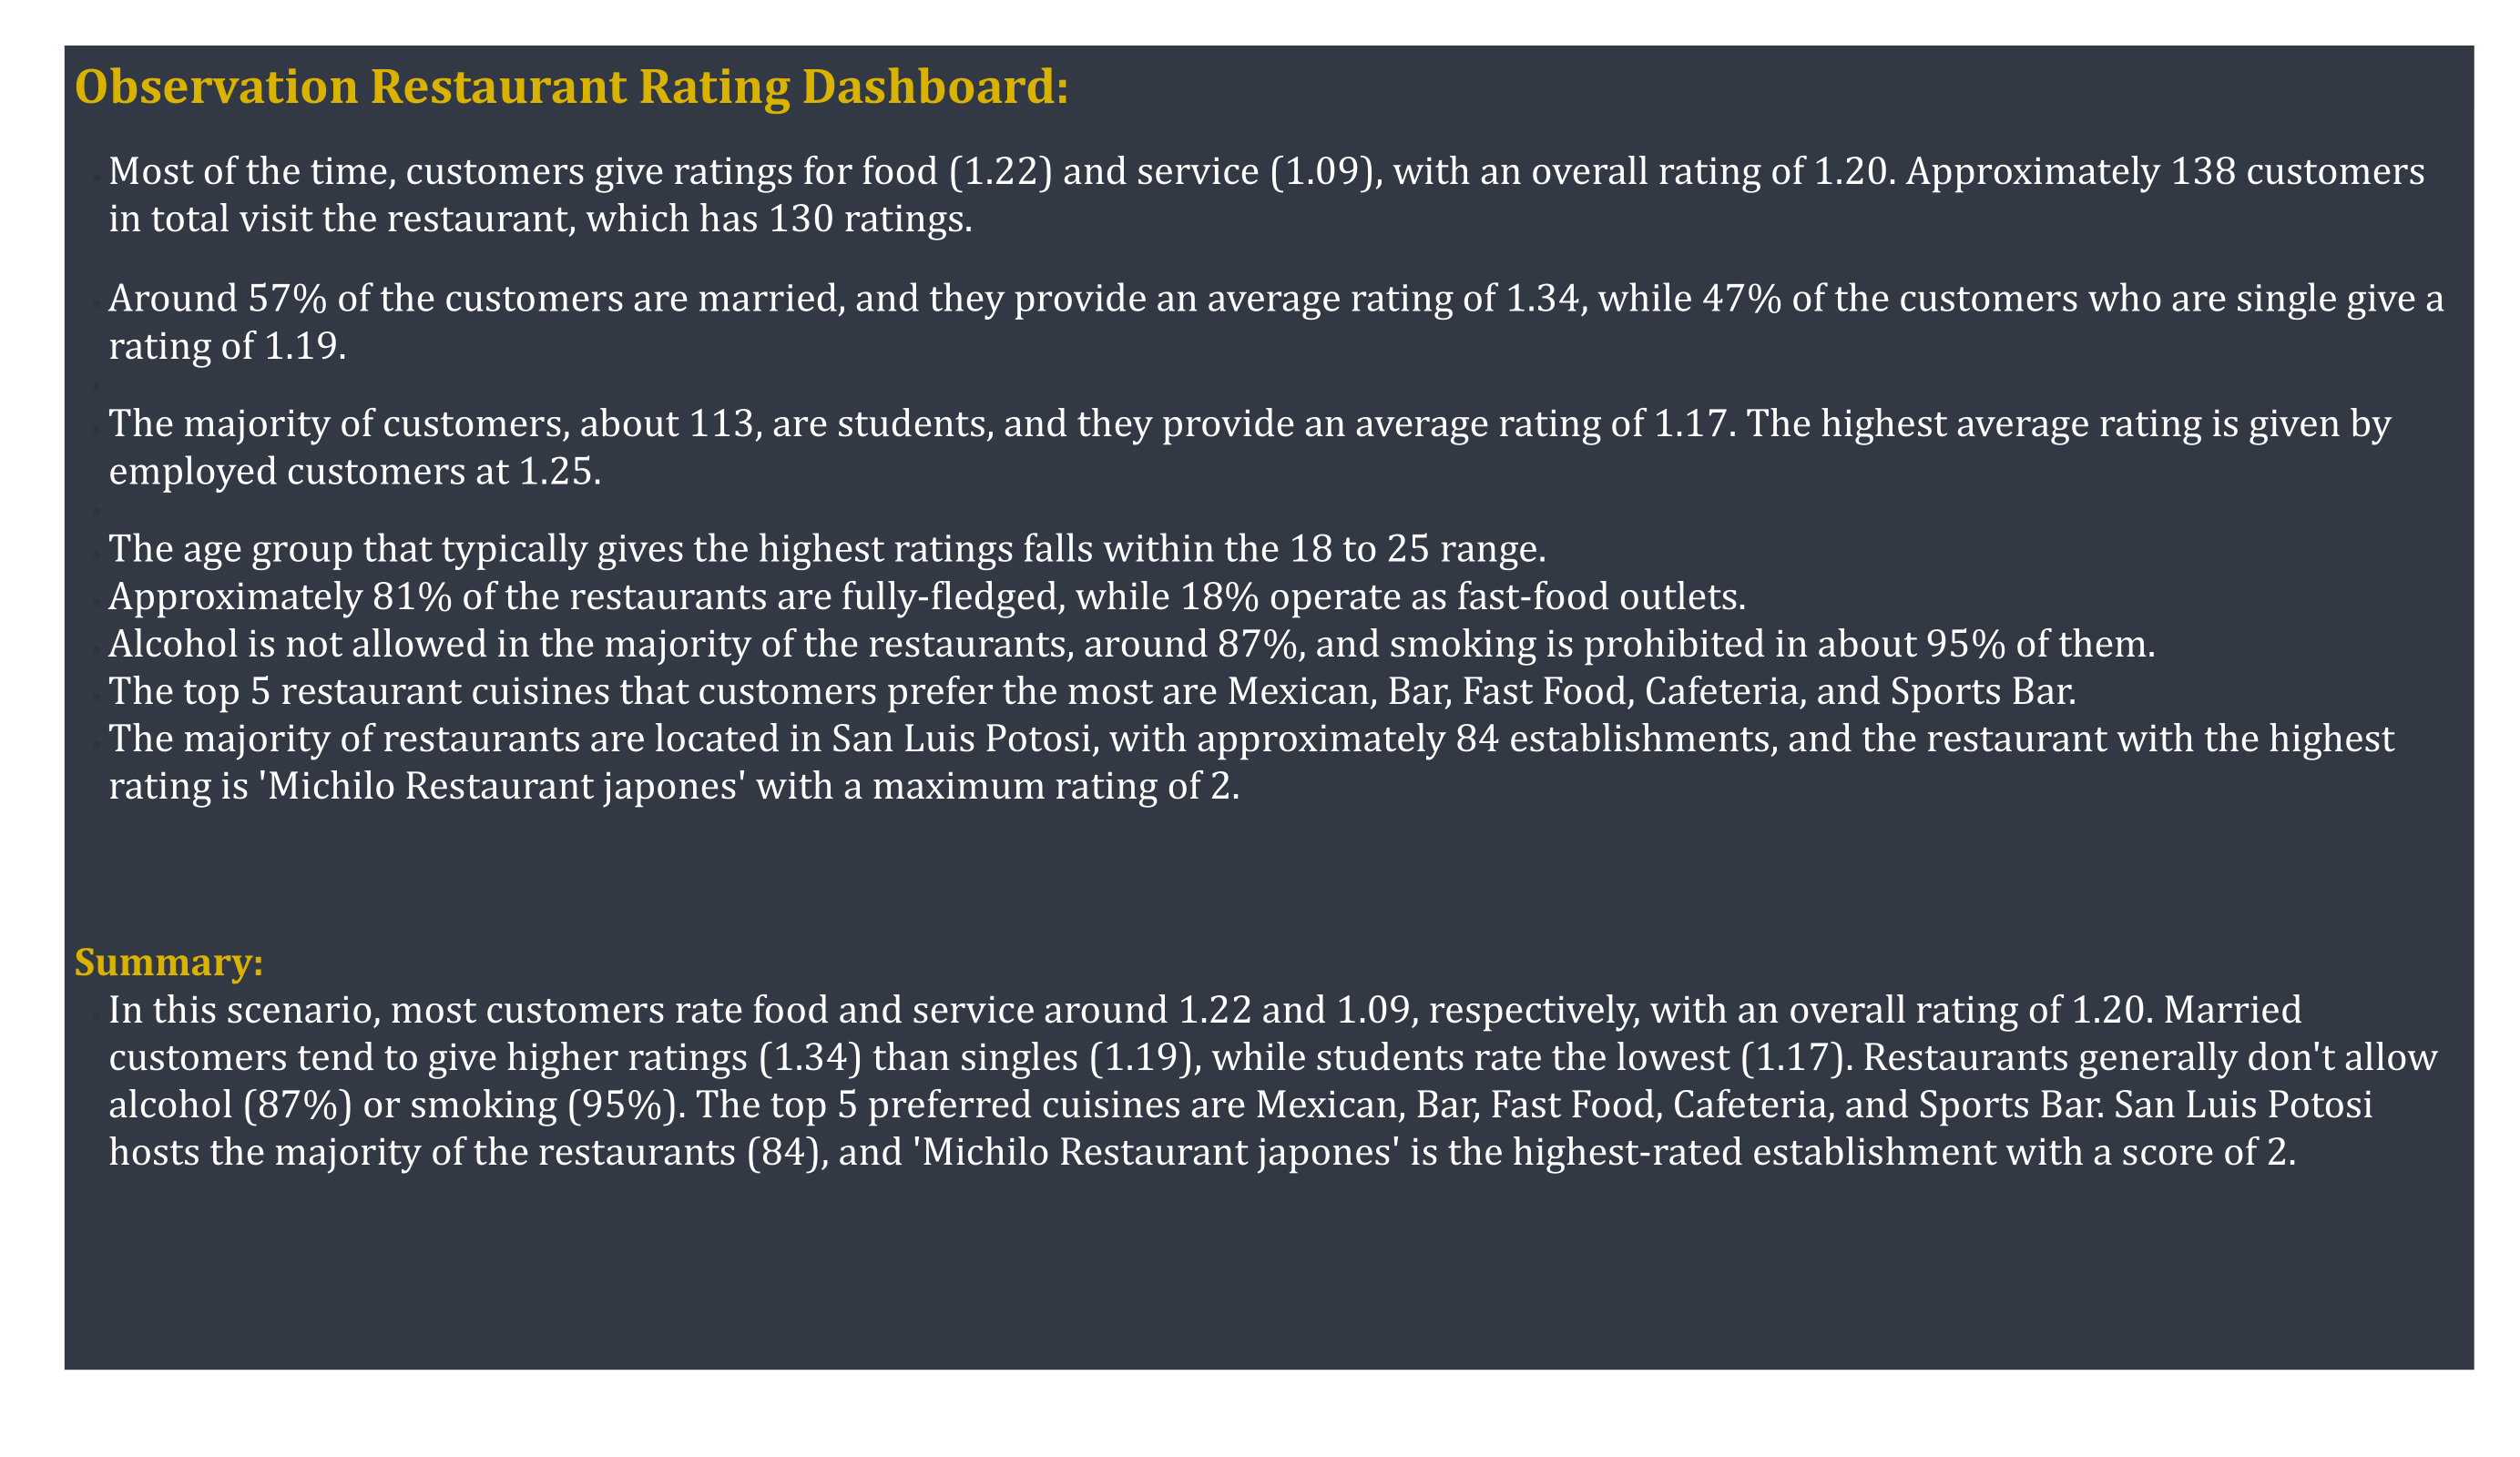

##  Data Preprocessing

In [16]:
df.head(2)

,Consumer_ID,City,State,Smoker,Drink_Level,Transportation_Method,Marital_Status,Children,Age,Occupation,Budget,Preferred_Cuisine,Restaurant Name,Alcohol_Service,Smoking_Allowed,Price,Franchise,Area,Parking,Rating
0,U1001,San Luis Potosi,San Luis Potosi,No,Abstemious,On Foot,Single,Independent,23,Student,Medium,American,Rincon Huasteco,None,No,Low,No,Closed,None,1
1,U1002,San Luis Potosi,San Luis Potosi,No,Abstemious,Public,Single,Independent,22,Student,Low,Mexican,Crudalia,Wine & Beer,Smoking Section,Low,No,Open,None,2


In [17]:
cat_col = ['City', 'State', 'Smoker', 'Drink_Level',
       'Transportation_Method', 'Marital_Status', 'Children', 'Occupation',
       'Budget', 'Preferred_Cuisine', 'Restaurant Name', 'Alcohol_Service',
       'Smoking_Allowed', 'Price', 'Franchise', 'Area', 'Parking']

In [18]:
#categorical data conver numbric data using  OrdinalEncoder sklearn libries
from sklearn.preprocessing import OrdinalEncoder
label_incodeing = OrdinalEncoder()
df[cat_col] = pd.DataFrame(label_incodeing.fit_transform(df[cat_col]))

In [19]:
df.drop(columns=["Consumer_ID"],axis=1,inplace=True)

In [20]:
df.head()

,City,State,Smoker,Drink_Level,Transportation_Method,Marital_Status,Children,Age,Occupation,Budget,Preferred_Cuisine,Restaurant Name,Alcohol_Service,Smoking_Allowed,Price,Franchise,Area,Parking,Rating
0,3.0,1.0,0.0,0.0,1.0,1.0,1.0,23,1.0,2.0,1.0,61.0,1.0,0.0,1.0,0.0,0.0,0.0,1
1,3.0,1.0,0.0,0.0,2.0,1.0,1.0,22,1.0,1.0,18.0,10.0,2.0,1.0,1.0,0.0,1.0,0.0,2
2,3.0,1.0,0.0,2.0,2.0,1.0,1.0,23,1.0,1.0,18.0,51.0,1.0,0.0,0.0,0.0,0.0,3.0,0
3,1.0,0.0,0.0,0.0,2.0,1.0,1.0,72,0.0,2.0,2.0,56.0,1.0,0.0,2.0,0.0,0.0,0.0,1
4,3.0,1.0,0.0,0.0,2.0,1.0,1.0,20,1.0,2.0,1.0,55.0,2.0,0.0,0.0,0.0,0.0,3.0,1


## Correlation between variables

Text(0.5, 1.0, 'Correlation between variables.')

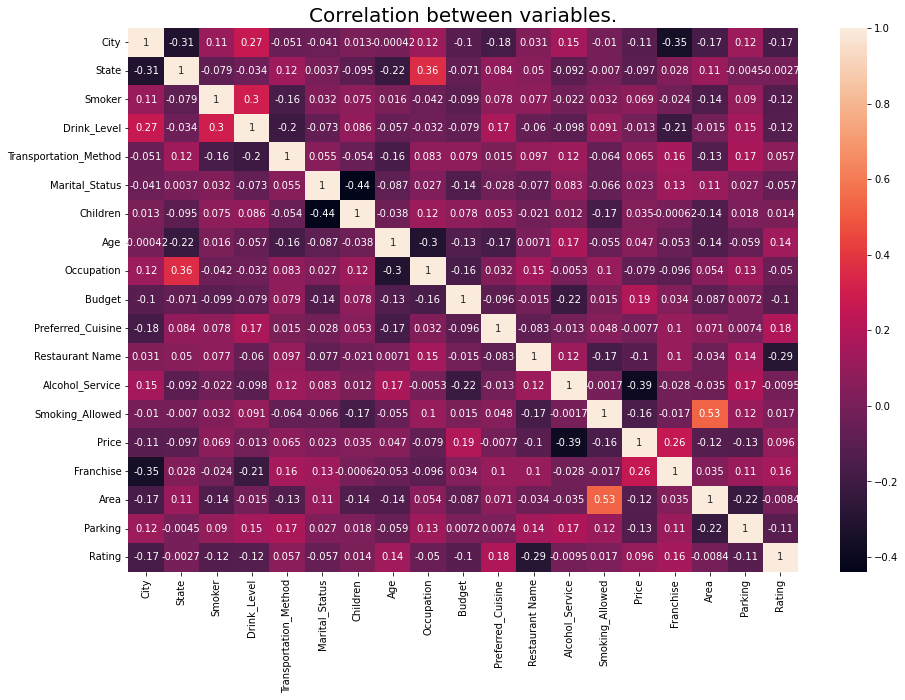

In [71]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.title("Correlation between variables.",size=20)

##  X and Y defined.

In [22]:
x = df.iloc[:,:-1]
y = df["Rating"]

In [23]:
x.head()

,City,State,Smoker,Drink_Level,Transportation_Method,Marital_Status,Children,Age,Occupation,Budget,Preferred_Cuisine,Restaurant Name,Alcohol_Service,Smoking_Allowed,Price,Franchise,Area,Parking
0,3.0,1.0,0.0,0.0,1.0,1.0,1.0,23,1.0,2.0,1.0,61.0,1.0,0.0,1.0,0.0,0.0,0.0
1,3.0,1.0,0.0,0.0,2.0,1.0,1.0,22,1.0,1.0,18.0,10.0,2.0,1.0,1.0,0.0,1.0,0.0
2,3.0,1.0,0.0,2.0,2.0,1.0,1.0,23,1.0,1.0,18.0,51.0,1.0,0.0,0.0,0.0,0.0,3.0
3,1.0,0.0,0.0,0.0,2.0,1.0,1.0,72,0.0,2.0,2.0,56.0,1.0,0.0,2.0,0.0,0.0,0.0
4,3.0,1.0,0.0,0.0,2.0,1.0,1.0,20,1.0,2.0,1.0,55.0,2.0,0.0,0.0,0.0,0.0,3.0


In [24]:
y.head()

0    1
1    2
2    0
3    1
4    1
Name: Rating, dtype: int64

## train_test_split

In [25]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.20,random_state=43)
print(xtrain.shape)
print(xtest.shape)

(91, 18)
(23, 18)


In [26]:
# values normalation StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
xtrain = pd.DataFrame(scaler.fit_transform(xtrain),columns=xtrain.columns)
xtest = pd.DataFrame(scaler.transform(xtest),columns=xtest.columns)

## ML Building RandomForestClassifier

In [27]:
# from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
LR = RandomForestClassifier()
LR.fit(xtrain,ytrain)

y_pred = LR.predict(xtest)

In [28]:
from sklearn.metrics import confusion_matrix , classification_report

print(confusion_matrix(ytest,y_pred))
print(classification_report(ytest,y_pred))

[[1 4 0]
 [1 8 3]
 [1 4 1]]
              precision    recall  f1-score   support

           0       0.33      0.20      0.25         5
           1       0.50      0.67      0.57        12
           2       0.25      0.17      0.20         6

    accuracy                           0.43        23
   macro avg       0.36      0.34      0.34        23
weighted avg       0.40      0.43      0.40        23



<AxesSubplot:>

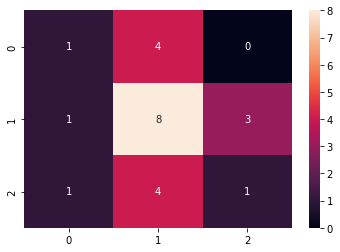

In [29]:
sns.heatmap(confusion_matrix(ytest,y_pred),annot=True)

## building a neural Network

In [30]:
from keras.utils import to_categorical
YTRAIN = to_categorical(ytrain)
YTRAIN[:10]

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [31]:
YTEST = to_categorical(ytest)
YTEST[:10]

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [32]:
from keras import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping

In [33]:
ann = Sequential()


ann.add(Dense(64,input_dim=xtrain.shape[1],activation="relu"))
ann.add(Dropout(0.5))
ann.add(Dense(32,activation="relu"))
ann.add(Dropout(0.5))
ann.add(Dense(3,activation="softmax"))

In [34]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1216      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 3,395
Trainable params: 3,395
Non-trainable params: 0
_________________________________________________________________


In [35]:
early_stop = EarlyStopping(monitor="val_loss",patience=10)

In [36]:
ann.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

## Train the model

In [37]:
hist = ann.fit(xtrain,YTRAIN,validation_split=0.20,epochs=100,callbacks=[early_stop])

Epoch 1/100
3/3 [==============================] - 2s 330ms/step - loss: 1.6998 - accuracy: 0.3056 - val_loss: 1.2376 - val_accuracy: 0.2632
Epoch 2/100
3/3 [==============================] - 0s 41ms/step - loss: 1.5915 - accuracy: 0.2917 - val_loss: 1.2046 - val_accuracy: 0.2632
Epoch 3/100
3/3 [==============================] - 0s 38ms/step - loss: 1.5871 - accuracy: 0.2778 - val_loss: 1.1787 - val_accuracy: 0.2632
Epoch 4/100
3/3 [==============================] - 0s 41ms/step - loss: 1.5537 - accuracy: 0.2917 - val_loss: 1.1548 - val_accuracy: 0.2632
Epoch 5/100
3/3 [==============================] - 0s 45ms/step - loss: 1.2986 - accuracy: 0.3194 - val_loss: 1.1385 - val_accuracy: 0.3684
Epoch 6/100
3/3 [==============================] - 0s 37ms/step - loss: 1.1484 - accuracy: 0.4306 - val_loss: 1.1284 - val_accuracy: 0.3684
Epoch 7/100
3/3 [==============================] - 0s 38ms/step - loss: 1.2813 - accuracy: 0.3750 - val_loss: 1.1227 - val_accuracy: 0.3158
Epoch 8/100
3/3 [==

## Learning curve plot visulazation

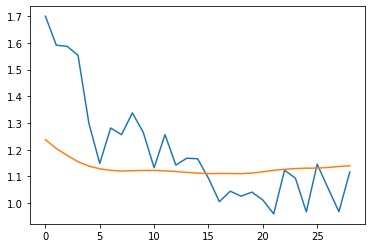

In [38]:
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])

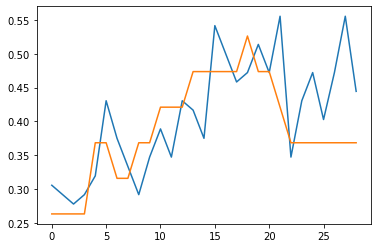

In [39]:
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])

## evaluate

In [40]:
ann.evaluate(xtrain,YTRAIN)
ann.evaluate(xtest,YTEST)

1/1 [==============================] - 0s 69ms/step - loss: 1.0265 - accuracy: 0.5652


[1.0265103578567505, 0.5652173757553101]

## prediction

In [41]:
y_pred_nn = ann.predict(xtest)

1/1 [==============================] - 0s 243ms/step


In [42]:
y_pred_nn[0]

array([0.14176978, 0.37934136, 0.47888872], dtype=float32)

In [43]:
ypred_classes = np.argmax(y_pred_nn, axis=-1)
ypred_classes

array([2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 0, 2, 1, 1, 1, 2,
       1], dtype=int64)

In [44]:
ytest_classes = np.argmax(YTEST,axis=1)
ytest_classes

array([0, 2, 1, 0, 0, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 0, 0, 1, 1, 1, 1,
       1], dtype=int64)

## matrix

In [45]:
print(confusion_matrix(ytest_classes,ypred_classes))

[[1 2 2]
 [0 9 3]
 [0 3 3]]


<AxesSubplot:>

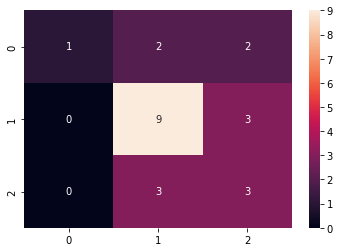

In [46]:
sns.heatmap(confusion_matrix(ytest_classes,ypred_classes),annot=True)

In [47]:
print(classification_report(ytest_classes,ypred_classes))

              precision    recall  f1-score   support

           0       1.00      0.20      0.33         5
           1       0.64      0.75      0.69        12
           2       0.38      0.50      0.43         6

    accuracy                           0.57        23
   macro avg       0.67      0.48      0.48        23
weighted avg       0.65      0.57      0.55        23



## load test data

In [50]:
test_df = pd.read_excel(r"C:\Users\Dell\OneDrive\Desktop\I become a data analyst this months\excel\datasets\restaurant rating\test_dataset.xlsx")
test_df.head()

,Consumer_ID,City,State,Smoker,Drink_Level,Transportation_Method,Marital_Status,Children,Age,Occupation,Budget,Preferred_Cuisine,Restaurant Name,Alcohol_Service,Smoking_Allowed,Price,Franchise,Area,Parking
0,U1115,San Luis Potosi,San Luis Potosi,Yes,Social Drinker,Public,Single,Independent,22,Student,Low,Regional,El Herradero Restaurante And Bar,Wine & Beer,Smoking Section,Medium,No,Closed,Yes
1,U1116,San Luis Potosi,San Luis Potosi,No,Social Drinker,Public,Married,Kids,25,Student,Medium,Mexican,Restaurante Casa De Las Flores,Wine & Beer,Smoking Section,High,No,Closed,Yes
2,U1117,Cuernavaca,Morelos,No,Abstemious,Public,Single,Independent,30,Employed,Medium,Turkish,El Oceano Dorado,Full Bar,Yes,Medium,No,Open,Yes
3,U1118,Cuernavaca,Morelos,Yes,Casual Drinker,Public,Single,Independent,25,Student,Medium,Pizzeria,Chilis Cuernavaca,Wine & Beer,No,Medium,No,Closed,None
4,U1119,Cuernavaca,Morelos,No,Abstemious,Public,Single,Independent,20,Student,Medium,Mexican,Restaurant Las Mañanitas,Wine & Beer,No,High,No,Closed,Yes


In [51]:
test_df[cat_col] = pd.DataFrame(label_incodeing.fit_transform(test_df[cat_col]))

In [52]:
test_df.head(2)

,Consumer_ID,City,State,Smoker,Drink_Level,Transportation_Method,Marital_Status,Children,Age,Occupation,Budget,Preferred_Cuisine,Restaurant Name,Alcohol_Service,Smoking_Allowed,Price,Franchise,Area,Parking
0,U1115,3.0,1.0,1.0,2.0,2.0,1.0,0.0,22,1.0,0.0,5.0,4.0,2.0,1.0,2.0,0.0,0.0,3.0
1,U1116,3.0,1.0,0.0,2.0,2.0,0.0,1.0,25,1.0,1.0,2.0,13.0,2.0,1.0,0.0,0.0,0.0,3.0


In [54]:
text_ml = test_df.iloc[:,1:]

## prediction test data

In [55]:
y_test_pred = ann.predict(text_ml)

1/1 [==============================] - 0s 51ms/step


In [56]:
test_ypred_classes = np.argmax(y_pred_nn, axis=-1)
test_ypred_classes

array([2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 0, 2, 1, 1, 1, 2,
       1], dtype=int64)

In [57]:
test_ypred_classes = pd.DataFrame(test_ypred_classes,columns=["Prediction_Rating"]) 

In [59]:
test_ypred_classes.head(2)

,Prediction_Rating
0,2
1,2


In [61]:
final_output = pd.concat([test_df,test_ypred_classes],axis=1)

In [70]:
final_submition = final_output[["Consumer_ID","Prediction_Rating"]].head(5)
final_submition.head()

,Consumer_ID,Prediction_Rating
0,U1115,2.0
1,U1116,2.0
2,U1117,1.0
3,U1118,1.0
4,U1119,1.0


In [67]:
#sove cvs file for final submition
final_submition.to_csv("final_summaition.csv")